In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [ ]:
iris=load_iris()
#iris


In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X=pd.DataFrame(iris['data'],columns=iris['feature_names'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Y=pd.DataFrame(iris['target'])
#Y
Y=iris['target']
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#Sepal length=2.1, Sepal Width=3.2, Petal length=1.4, Petal width=1.5?

**Divide the data into training and validation sets**

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.4,random_state=3)

In [ ]:
print(X.shape)
print(Y.shape)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(150, 4)
(150,)
(105, 4)
(45, 4)
(105,)
(45,)


In [ ]:
#print(Ytrain[0].value_counts())
#print(Ytest[0].value_counts())

**Train your Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kmodel=KNeighborsClassifier(n_neighbors=3)
kmodel.fit(X,Y)
kmodel.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=3)

**Evaluate the trained model on training data**

In [ ]:
Yp=kmodel.predict(X)
Yp
Ytrain_p=kmodel.predict(Xtrain)
#kmodel.score(Xtrain,Ytrain)

In [ ]:
(Yp==Y).sum()/len(X)
(Ytrain_p==Ytrain).sum()/len(Xtrain)

0.9809523809523809

**Evaluate the model performance on unknown data or validation data**

In [ ]:
Ytest_p=kmodel.predict(Xtest)
#kmodel.score(Xtest,Ytest)

In [ ]:
(Ytest_p==Ytest).sum()/len(Xtest)

0.9777777777777777

**Make Predictions**

In [ ]:
#iris['target_names']
#iris

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:

import numpy as np
name=np.array(['sentosa','vericolor','virginica'])


In [ ]:
print(name[kmodel.predict([[3.2,4.2,4.4,3.5]])])

['virginica']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


**Tune parameters**

In [ ]:
ts_acc=[]
tr_acc=[]
for i in range(1,15):
  km=KNeighborsClassifier(n_neighbors=i)

  km.fit(Xtrain,Ytrain)
  Yp_train=km.predict(Xtrain)
  atr=(Yp_train==Ytrain).sum()/len(Xtrain)
  print('training accuracy for neighbour=',i)
  print(atr)
  tr_acc.append(atr)
  Yp_test=km.predict(Xtest)
  ats=(Yp_test==Ytest).sum()/len(Xtest)
  print('testing accuracy for neighbour=',i)
  print(ats)
  ts_acc.append(ats)
  
  #atrain=kmodel.score(Xtrain,Ytrain)
  #atest=kmodel.score(Xtest,Ytest)


training accuracy for neighbour= 1
1.0
testing accuracy for neighbour= 1
0.9666666666666667
training accuracy for neighbour= 2
0.9777777777777777
testing accuracy for neighbour= 2
0.9666666666666667
training accuracy for neighbour= 3
0.9777777777777777
testing accuracy for neighbour= 3
0.95
training accuracy for neighbour= 4
0.9888888888888889
testing accuracy for neighbour= 4
0.95
training accuracy for neighbour= 5
0.9888888888888889
testing accuracy for neighbour= 5
0.9333333333333333
training accuracy for neighbour= 6
0.9777777777777777
testing accuracy for neighbour= 6
0.95
training accuracy for neighbour= 7
0.9777777777777777
testing accuracy for neighbour= 7
0.95
training accuracy for neighbour= 8
0.9666666666666667
testing accuracy for neighbour= 8
0.95
training accuracy for neighbour= 9
0.9777777777777777
testing accuracy for neighbour= 9
0.95
training accuracy for neighbour= 10
0.9777777777777777
testing accuracy for neighbour= 10
0.9333333333333333
training accuracy for neigh

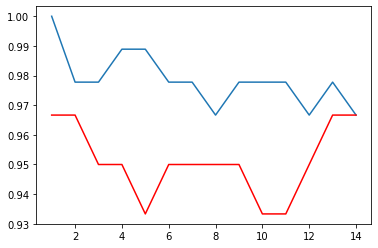

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),tr_acc)
plt.plot(range(1,15),ts_acc,color='red')
plt.show()

**Decision Tree**
**GINI Index**
(Pp(1-Pp)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dmodel=DecisionTreeClassifier()

In [ ]:
dmodel.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [ ]:
dmodel.score(Xtrain,Ytrain)

1.0

In [ ]:
dmodel.score(Xtest,Ytest)

0.95

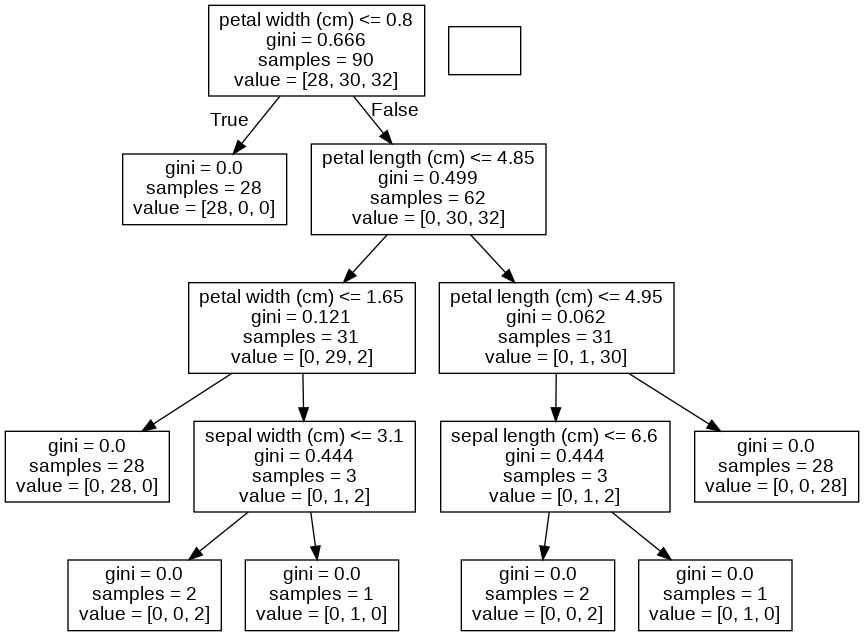

In [ ]:
from sklearn import tree
dot_data=tree.export_graphviz(dmodel,out_file=None,feature_names=Xtrain.columns)

from IPython.display import Image
import pydotplus
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


**Support Vector Machine**

In [ ]:
#import pandas as pd
#from sklearn.datasets import load_iris
#iris = load_iris()

In [ ]:
#iris.feature_names

In [ ]:
#iris.target_names

In [ ]:
#df = pd.DataFrame(iris.data,columns=iris.feature_names)
#df.head()

In [ ]:
#df['target'] = iris.target
#df.head()


In [ ]:
#df[df.target==1].head()

In [ ]:
#df[df.target==2].head()

In [ ]:
#df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
#df.head()

In [ ]:
#df[45:55]

In [ ]:
#df0 = df[:50]
#df1 = df[50:100]
#df2 = df[100:]

In [ ]:
import matplotlib.pyplot as plt

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

In [ ]:
#plt.xlabel('Sepal Length')
#plt.ylabel('Sepal Width')
#plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
#plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

**Petal length vs Pepal Width (Setosa vs Versicolor)**

In [ ]:
#plt.xlabel('Petal Length')
#plt.ylabel('Petal Width')
#plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
#plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [ ]:
#from sklearn.model_selection import train_test_split
#X = df.drop(['target','flower_name'], axis='columns')
#y = df.target
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#len(X_train)

In [ ]:
#len(X_test)

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
model.predict([[4.8,3.0,1.5,0.3]])

**Tune parameters**

1. Regularization (C)

In [ ]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_c.score(x_train,y_train)
model_C.score(X_test, y_test)

In [ ]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

**2. Gamma**

In [ ]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

**3. Kernel**

In [ ]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

In [ ]:
model_linear_kernal.score(X_test, y_test)